In [12]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt

Generate synthetic datasets for classification tasks

In [4]:
X,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=12)

reduant:These features are linear combinations of the informative features and add noise to the dataset.
here No redundant features are included. All features are informative, meaning they contribute directly to determining the class labels.

weight:The proportions of samples assigned to each class. It’s useful for generating imbalanced datasets.
weights=[0.90] This creates an imbalanced dataset where 90% of the samples belong to one class. The remaining 10% will be divided among the other class(es).

In [10]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [11]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

imbalanced data set has been created.

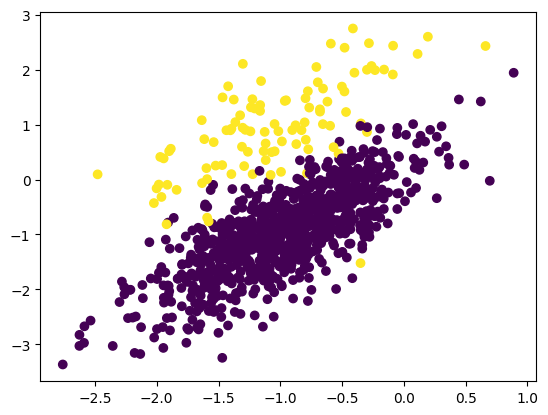

In [13]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

## Apply SMOTE(synthetic minority oversampling Technique)


* SMOTE is used to handle imbalanced dataset.it involves generating synthetic instances of minority class by interpolating b/w exisiting instance.

* For each minority class sample, SMOTE selects k nearest neighbors from the same class.It then randomly selects one of these neighbors and 

generates a new sample by interpolating between the feature values of the original sample and the selected neighbor.

* This process is repeated until the desired number of synthetic samples is created

* Since SMOTE generates new data rather than duplicating existing samples, it helps to avoid overfitting that can occur with simple oversampling(upsampling).

In [ ]:
%pip install imblearn

In [27]:
from imblearn.over_sampling import SMOTE

In [16]:
# transform the dataset using smote
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

fit: It learns the properties of the input dataset, specifically identifying the minority class and its distribution.

resample: It generates synthetic samples for the minority class to balance the dataset.

X: The new feature set after applying SMOTE. It contains both the original and the synthetic samples.

y: The new target labels corresponding to the balanced dataset. It will have more samples for the minority class.

In [18]:
X.shape

(1800, 2)

In [19]:
y.shape

(1800,)

In [22]:
len(y[y==0])

900

In [23]:
len(y[y==1])

900

In [25]:
#create new df for transformed data 
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)
oversample_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


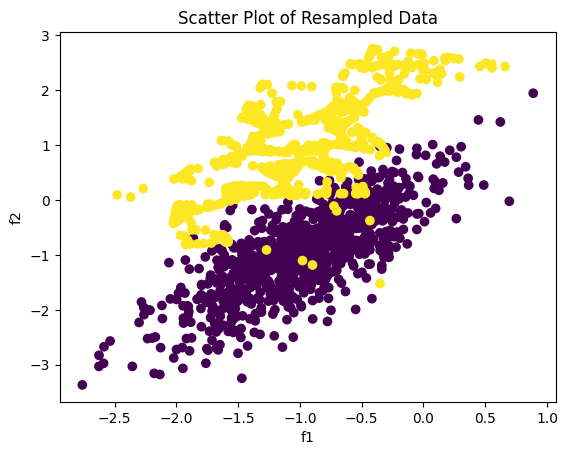

In [28]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Scatter Plot of Resampled Data')
plt.show()

 after smote, all the yellow dots (minority) are connected and increased the no:of minority class.